In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
a_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Finland'],
    'Population (M)': [82.8, 67.2, 11.4, 5.5],
    'Capital': ['Berlin', 'Paris', 'Brussels', 'Helsinki']
})
a_df

,Country,Population (M),Capital
0,Germany,82.8,Berlin
1,France,67.2,Paris
2,Belgium,11.4,Brussels
3,Finland,5.5,Helsinki


In [3]:
b_df = pd.DataFrame({
    'Country': ['Germany', 'France', 'Belgium', 'Canada'],
    'HDI': [0.936, 0.901, 0.916, 0.926]
})
b_df

,Country,HDI
0,Germany,0.936
1,France,0.901
2,Belgium,0.916
3,Canada,0.926


# Merge function

In [4]:
outer_merge = a_df.merge(b_df, on = 'Country', how = 'outer')
outer_merge

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,0.936
1,France,67.2,Paris,0.901
2,Belgium,11.4,Brussels,0.916
3,Finland,5.5,Helsinki,NaN
4,Canada,NaN,NaN,0.926


In [5]:
outer_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
Country           5 non-null object
Population (M)    4 non-null float64
Capital           4 non-null object
HDI               4 non-null float64
dtypes: float64(2), object(2)
memory usage: 200.0+ bytes


# Join function

In [6]:
aa_df = a_df.set_index("Country")
aa_df

,Population (M),Capital
Country,,
Germany,82.8,Berlin
France,67.2,Paris
Belgium,11.4,Brussels
Finland,5.5,Helsinki


In [7]:
bb_df = b_df.set_index("Country")
bb_df

,HDI
Country,
Germany,0.936
France,0.901
Belgium,0.916
Canada,0.926


In [8]:
aa_df.join(bb_df, how = 'outer')

,Population (M),Capital,HDI
Country,,,
Belgium,11.4,Brussels,0.916
Canada,NaN,NaN,0.926
Finland,5.5,Helsinki,NaN
France,67.2,Paris,0.901
Germany,82.8,Berlin,0.936


In [9]:
concat_df = pd.concat([a_df, b_df], axis="index", sort=False)
concat_df

,Country,Population (M),Capital,HDI
0,Germany,82.8,Berlin,NaN
1,France,67.2,Paris,NaN
2,Belgium,11.4,Brussels,NaN
3,Finland,5.5,Helsinki,NaN
0,Germany,NaN,NaN,0.936
1,France,NaN,NaN,0.901
2,Belgium,NaN,NaN,0.916
3,Canada,NaN,NaN,0.926


# Olympic Games

In [10]:
countries_df = pd.read_csv('dictionary.csv')
countries_df.head(2)

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582


In [11]:
summer_df = pd.read_csv('summer.csv').rename(columns = {'Country' : 'Code'})
summer_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver


In [12]:
winter_df = pd.read_csv('winter.csv').rename(columns = {'Country' : 'Code'})
winter_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze


In [13]:
summer_df['Season'] = 'Summer'
summer_df.head(3)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Summer


In [14]:
summer_countries_df = summer_df.merge(countries_df, on = 'Code', how = 'outer')
summer_countries_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Population,GDP per Capita
0,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Summer,Hungary,9844686.0,12363.54346
1,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Summer,Hungary,9844686.0,12363.54346


In [15]:
winter_df['Season'] = 'Winter'
winter_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Winter
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Winter


In [16]:
winter_countries_df = winter_df.merge(countries_df, on = 'Code', how = 'outer')
winter_countries_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Population,GDP per Capita
0,1924.0,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Winter,France,66808385.0,36205.568102
1,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Winter,France,66808385.0,36205.568102


In [17]:
all_df = pd.concat([winter_countries_df,summer_countries_df])
all_df.head(2)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Population,GDP per Capita
0,1924.0,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,Winter,France,66808385.0,36205.568102
1,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,Winter,France,66808385.0,36205.568102


#### use boolean indexing, grouping & sorting to print a list of the Top 10 countries who won the most medals since 1984

###### 1/ delete before 1984

In [18]:
all84_df = all_df[all_df.Year >= 1984]
all84_df.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Season,Country,Population,GDP per Capita
47,1984.0,Sarajevo,Skiing,Alpine Skiing,"PELEN, Perrine",FRA,Women,Giant Slalom,Bronze,Winter,France,66808385.0,36205.568102
48,1984.0,Sarajevo,Skiing,Alpine Skiing,"BOUVET, Didier",FRA,Men,Slalom,Bronze,Winter,France,66808385.0,36205.568102
49,1984.0,Sarajevo,Skiing,Alpine Skiing,"PELEN, Perrine",FRA,Women,Slalom,Silver,Winter,France,66808385.0,36205.568102
50,1988.0,Calgary,Skiing,Alpine Skiing,"PICCARD, Franck",FRA,Men,Downhill,Bronze,Winter,France,66808385.0,36205.568102
51,1988.0,Calgary,Skiing,Alpine Skiing,"PICCARD, Franck",FRA,Men,Super-G,Gold,Winter,France,66808385.0,36205.568102


In [19]:
all84_df.groupby(['Country','Medal']).count().head(3)

Year  City  Sport  Discipline  Athlete  Code  Gender  \
Country     Medal                                                          
Afghanistan Bronze     2     2      2           2        2     2       2   
Algeria     Bronze     8     8      8           8        8     8       8   
            Gold       5     5      5           5        5     5       5   

                    Event  Season  Population  GDP per Capita  
Country     Medal                                              
Afghanistan Bronze      2       2           2               2  
Algeria     Bronze      8       8           8               8  
            Gold        5       5           5               5

In [20]:
medals_df = all84_df.groupby('Country').count()[['Medal']]
medals_df

,Medal
Country,
Afghanistan,2
Algeria,15
Argentina,173
Armenia,11
Australia,891
...,...
Venezuela,7
Vietnam,2
Virgin Islands*,1


In [30]:
all_count_df = medals_df.sort_values(by = 'Medal', ascending = False).head(11)
all_count_df

,Medal
Country,
United States,2472
Germany,1112
Russia,1031
Australia,891
China,889
Canada,801
Italy,632
"Korea, South",587
France,587


## Optional

In [22]:
season_count_df= all_df.groupby(['Country', 'Season'])['Medal'].count()
season_count_df.head()

Country      Season
Afghanistan  Summer       2
Algeria      Summer      15
Argentina    Summer     259
Armenia      Summer      11
Australia    Summer    1189
Name: Medal, dtype: int64

In [23]:
season_count_df = season_count_df.unstack()
season_count_df

Season,Summer,Winter
Country,,
Afghanistan,2.0,NaN
Algeria,15.0,NaN
Argentina,259.0,NaN
Armenia,11.0,NaN
Australia,1189.0,15.0
...,...,...
Venezuela,12.0,NaN
Vietnam,2.0,NaN
Virgin Islands*,1.0,NaN


In [24]:
season_count_df.fillna(0, inplace=True)

In [25]:
season_count_df["Summer"] = season_count_df["Summer"].astype(int)
season_count_df["Winter"] = season_count_df["Winter"].astype(int)
season_count_df.head(10)

Season,Summer,Winter
Country,,
Afghanistan,2,0
Algeria,15,0
Argentina,259,0
Armenia,11,0
Australia,1189,15
Austria,146,280
Azerbaijan,26,0
Bahamas,27,0
Bahrain,1,0


In [33]:
season_count_df["Total"] = medals_df
season_count_df.head(10)

Season,Summer,Winter,Total
Country,,,
Afghanistan,2,0,2.0
Algeria,15,0,15.0
Argentina,259,0,173.0
Armenia,11,0,11.0
Australia,1189,15,891.0
Austria,146,280,205.0
Azerbaijan,26,0,26.0
Bahamas,27,0,23.0
Bahrain,1,0,1.0


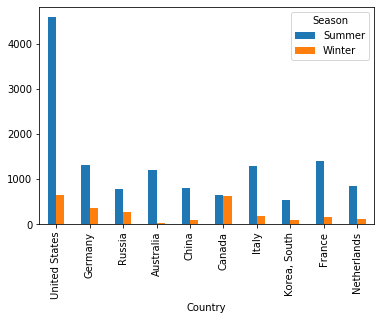

In [37]:
season_count_df.sort_values(by="Total", ascending=False)[["Summer", "Winter"]].head(10).plot(kind="bar")

In [ ]:
top_summer_df = df.drop(columns = ['Medal.Winter'])
top_summer_df